# Importing recquired libraries/modules/depndencies

In [903]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import streamlit as st
from sklearn.model_selection import  cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# DATA FILE 1 & 2 Loading , Observations and preprocessing

In [33]:
spacex_data_1 = pd.read_csv("spacex_launch_data.csv")

In [565]:
spacex_data_2 = pd.read_csv('output_file.csv')

In [559]:
spacex_data_1.columns = spacex_data_1.columns.str.strip()
spacex_data_2.columns = spacex_data_2.columns.str.strip()

In [251]:
spacex_data_2.shape

(205, 27)

In [253]:
spacex_data_1.shape

(57, 11)

In [255]:
spacex_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fairings               169 non-null    object 
 1   links                  205 non-null    object 
 2   static_fire_date_utc   121 non-null    object 
 3   static_fire_date_unix  121 non-null    float64
 4   net                    205 non-null    bool   
 5   window                 117 non-null    float64
 6   rocket                 205 non-null    object 
 7   success                186 non-null    float64
 8   failures               205 non-null    object 
 9   details                134 non-null    object 
 10  crew                   205 non-null    object 
 11  ships                  205 non-null    object 
 12  capsules               205 non-null    object 
 13  payloads               205 non-null    object 
 14  launchpad              205 non-null    object 
 15  flight

In [385]:
# Convert 'Flight Number' to integer
spacex_data_1['Flight Number'] = pd.to_numeric(spacex_data_1['Flight Number'], errors='coerce')

# Clean and convert 'Payload Mass (kg)'
spacex_data_1['Payload Mass (kg)'] = (
    spacex_data_1['Payload Mass (kg)']
    .str.replace(',', '', regex=False)  # Remove commas, if any
    .str.extract(r'(\d+\.?\d*)', expand=False)  # Extract numeric part
)
spacex_data_1['Payload Mass (kg)'] = pd.to_numeric(spacex_data_1['Payload Mass (kg)'], errors='coerce')


In [387]:
spacex_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Flight Number      56 non-null     float64       
 1   Date               57 non-null     datetime64[ns]
 2   Time (UTC)         57 non-null     object        
 3   Booster Version    57 non-null     object        
 4   Launch Site        57 non-null     object        
 5   Payload            57 non-null     object        
 6   Payload Mass (kg)  53 non-null     float64       
 7   Orbit              57 non-null     object        
 8   Customer           57 non-null     object        
 9   Mission Outcome    57 non-null     object        
 10  Landing Outcome    57 non-null     object        
 11  Year               57 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(8)
memory usage: 5.2+ KB


In [259]:
spacex_data_2.isna().sum()

fairings                  36
links                      0
static_fire_date_utc      84
static_fire_date_unix     84
net                        0
window                    88
rocket                     0
success                   19
failures                   0
details                   71
crew                       0
ships                      0
capsules                   0
payloads                   0
launchpad                  0
flight_number              0
name                       0
date_utc                   0
date_unix                  0
date_local                 0
date_precision             0
upcoming                   0
cores                      0
auto_update                0
tbd                        0
launch_library_id        133
id                         0
dtype: int64

In [261]:
spacex_data_1.isna().sum()

Flight Number        0
Date                 0
Time (UTC)           0
Booster Version      0
Launch Site          0
Payload              0
Payload Mass (kg)    2
Orbit                0
Customer             0
Mission Outcome      0
Landing Outcome      0
dtype: int64

In [263]:
spacex_data_1.duplicated().sum()

0

In [265]:
spacex_data_2.duplicated().sum()

0

In [267]:
spacex_data_1.columns

Index(['Flight Number', 'Date', 'Time (UTC)', 'Booster Version', 'Launch Site',
       'Payload', 'Payload Mass (kg)', 'Orbit', 'Customer', 'Mission Outcome',
       'Landing Outcome'],
      dtype='object')

In [269]:
spacex_data_2.columns

Index(['fairings', 'links', 'static_fire_date_utc', 'static_fire_date_unix',
       'net', 'window', 'rocket', 'success', 'failures', 'details', 'crew',
       'ships', 'capsules', 'payloads', 'launchpad', 'flight_number', 'name',
       'date_utc', 'date_unix', 'date_local', 'date_precision', 'upcoming',
       'cores', 'auto_update', 'tbd', 'launch_library_id', 'id'],
      dtype='object')

In [271]:
spacex_data_1['Landing Outcome'].head(20)

0       Failure   (parachute)
1       Failure   (parachute)
2                  No attempt
3                  No attempt
4                  No attempt
5        Uncontrolled (ocean)
6                  No attempt
7                  No attempt
8          Controlled (ocean)
9          Controlled (ocean)
10                 No attempt
11                 No attempt
12       Uncontrolled (ocean)
13      Failure  (drone ship)
14         Controlled (ocean)
15                 No attempt
16      Failure  (drone ship)
17                 No attempt
18    Precluded  (drone ship)
19      Success  (ground pad)
Name: Landing Outcome, dtype: object

In [273]:
data = pd.read_csv("spacex_300_launches.csv")

In [275]:
data.head()

,Details,Launch Success,Rocket ID,Name,Flight Number,Date (UTC)
0,Engine failure at 33 seconds and loss of vehicle,False,5e9d0d95eda69955f709d1eb,FalconSat,1,2006-03-24T22:30:00.000Z
1,Successful first stage burn and transition to ...,False,5e9d0d95eda69955f709d1eb,DemoSat,2,2007-03-21T01:10:00.000Z
2,Residual stage 1 thrust led to collision betwe...,False,5e9d0d95eda69955f709d1eb,Trailblazer,3,2008-08-03T03:34:00.000Z
3,Ratsat was carried to orbit on the first succe...,True,5e9d0d95eda69955f709d1eb,RatSat,4,2008-09-28T23:15:00.000Z
4,NaN,True,5e9d0d95eda69955f709d1eb,RazakSat,5,2009-07-13T03:35:00.000Z


In [277]:
rocket_sentiment_analysis_dataset = data[["Details", "Name", "Launch Success","Flight Number"]]

In [279]:
rocket_sentiment_analysis_dataset = rocket_sentiment_analysis_dataset[rocket_sentiment_analysis_dataset['Details'].notna()]

In [281]:
rocket_sentiment_analysis_dataset = rocket_sentiment_analysis_dataset.reset_index(drop=True)

In [283]:
rocket_sentiment_analysis_dataset.shape

(134, 4)

In [208]:
rocket_sentiment_analysis_dataset.head()

,Details,Name,Launch Success,Flight Number,Key Reason
0,Engine failure at 33 seconds and loss of vehicle,FalconSat,False,1,Failure Reason: failure
1,Successful first stage burn and transition to ...,DemoSat,False,2,Failure Reason: failed
2,Residual stage 1 thrust led to collision betwe...,Trailblazer,False,3,Failure Reason: collision
3,Ratsat was carried to orbit on the first succe...,RatSat,True,4,Success Reason: successful
4,"Launch was scrubbed on first attempt, second l...",COTS 2,True,8,Failure Reason: scrubbed


In [285]:
spacex_data_1.columns

Index(['Flight Number', 'Date', 'Time (UTC)', 'Booster Version', 'Launch Site',
       'Payload', 'Payload Mass (kg)', 'Orbit', 'Customer', 'Mission Outcome',
       'Landing Outcome'],
      dtype='object')

In [287]:
spacex_data_1.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute)
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [295]:
spacex_data_1['Mission Outcome']

0                               Success
1                               Success
2                               Success
3                               Success
4                               Success
5                               Success
6                               Success
7                               Success
8                               Success
9                               Success
10                              Success
11                              Success
12                              Success
13                              Success
14                              Success
15                              Success
16                              Success
17                              Success
18                 Failure  (in flight)
19                              Success
20                              Success
21                              Success
22                              Success
23                              Success
24                              Success


# EDA on spacex_data_1

# MIssion Outcome Distributions (Either they failed or succeeed)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_23832\3325231985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=spacex_data_1['Mission Outcome'], palette="Set2")


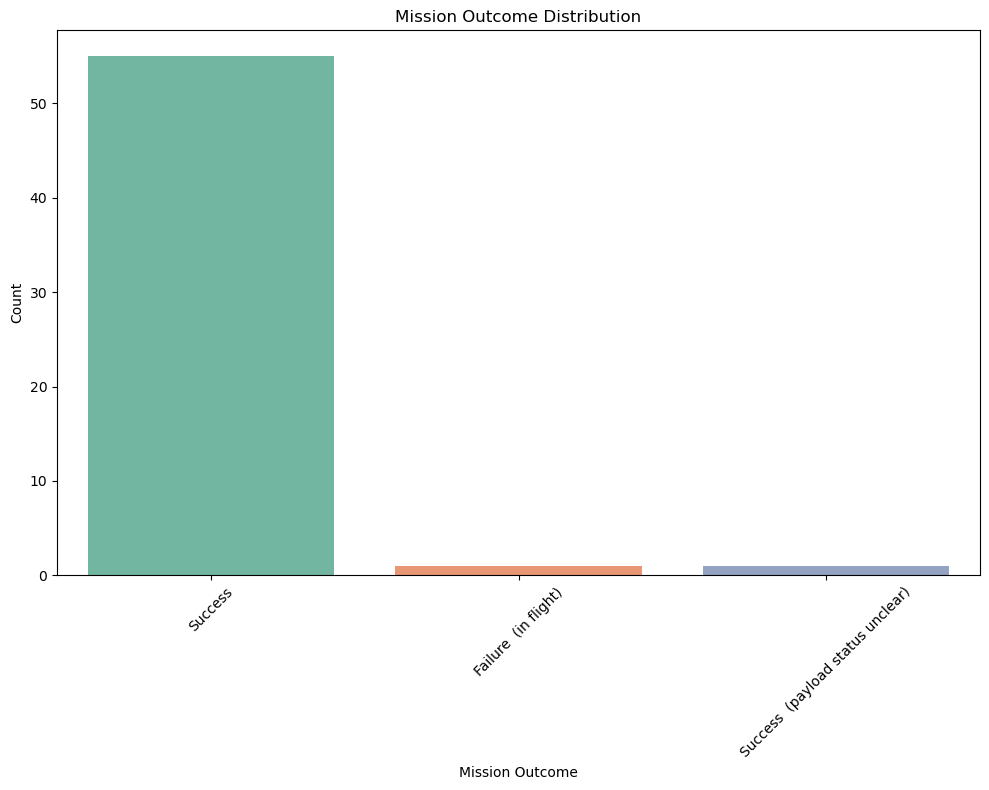

In [349]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x=spacex_data_1['Mission Outcome'], palette="Set2")
plt.title("Mission Outcome Distribution")
plt.xlabel("Mission Outcome")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Landing Outcome Distribution with mode of landing

C:\Users\PMLS\AppData\Local\Temp\ipykernel_23832\234835360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=spacex_data_1["Landing Outcome"], palette="Set2", order=spacex_data_1['Landing Outcome'].value_counts().index)


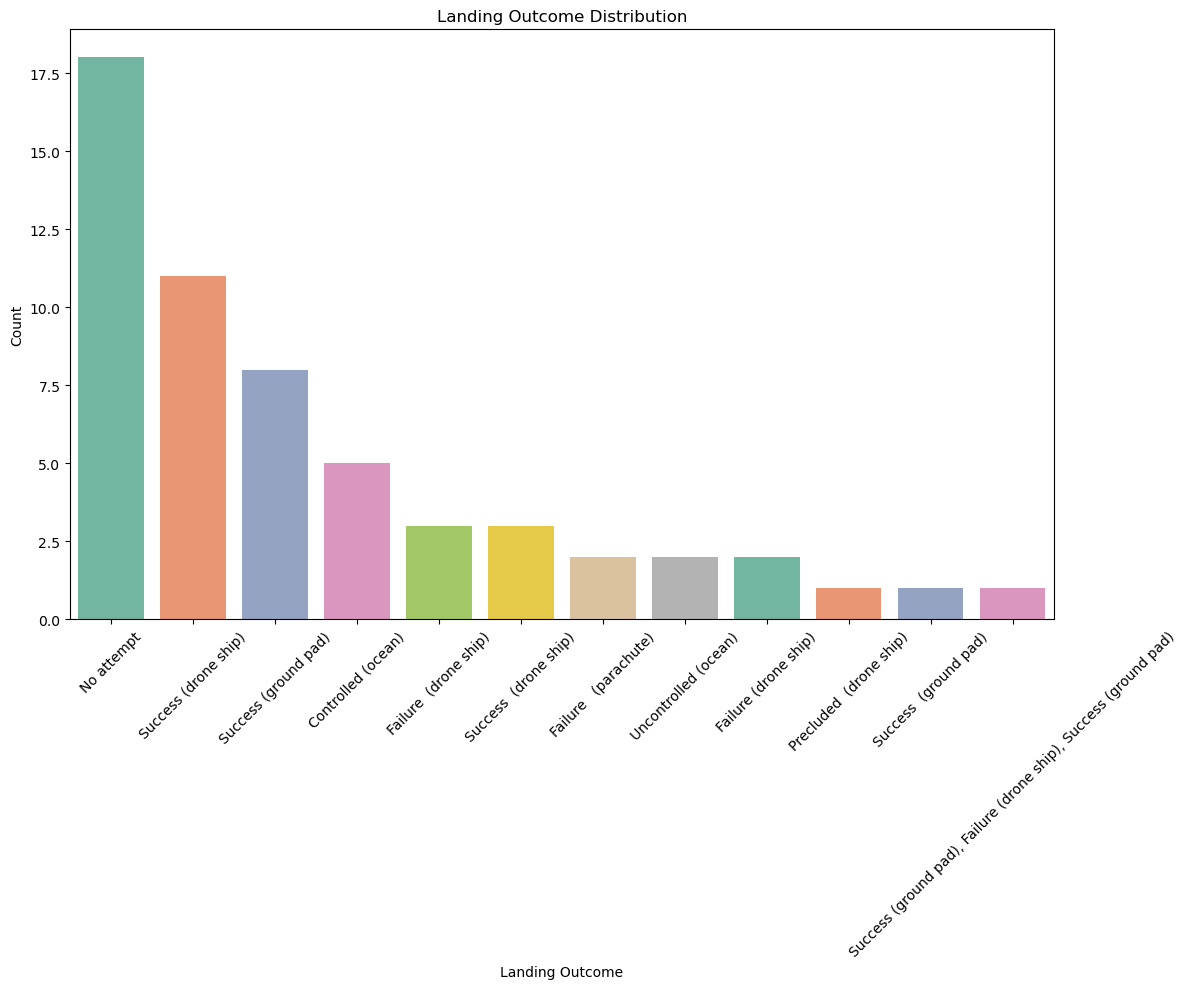

Landing Outcome
No attempt                                                          18
Success (drone ship)                                                11
Success (ground pad)                                                 8
Controlled (ocean)                                                   5
Failure  (drone ship)                                                3
Success  (drone ship)                                                3
Failure   (parachute)                                                2
Uncontrolled (ocean)                                                 2
Failure (drone ship)                                                 2
Precluded  (drone ship)                                              1
Success  (ground pad)                                                1
Success (ground pad), Failure (drone ship), Success (ground pad)     1
Name: count, dtype: int64

In [365]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x=spacex_data_1["Landing Outcome"], palette="Set2", order=spacex_data_1['Landing Outcome'].value_counts().index)
plt.title("Landing Outcome Distribution")
plt.xlabel("Landing Outcome")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

spacex_data_1['Landing Outcome'].value_counts()


# Launch Success Over the Years

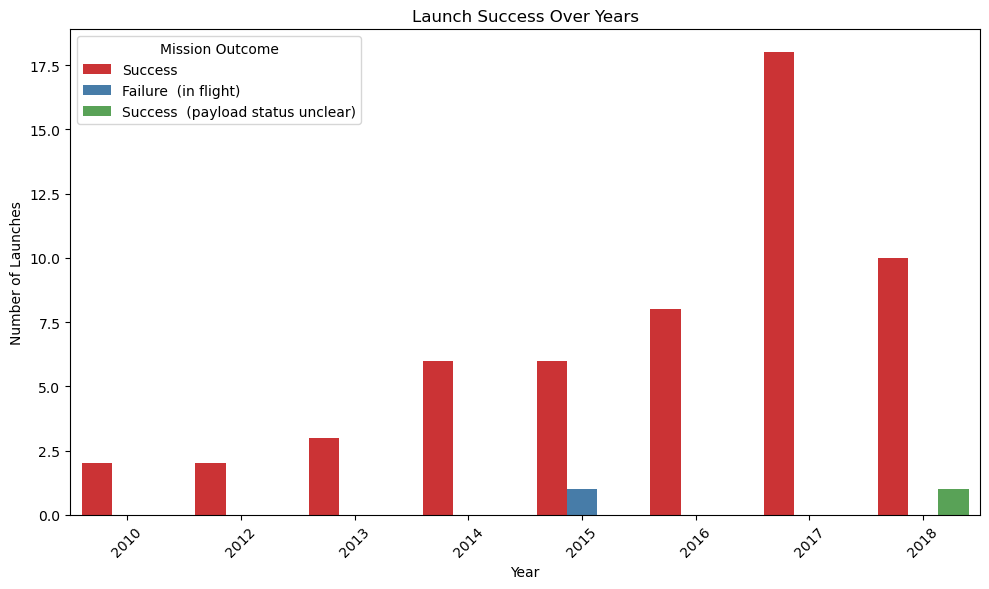

In [307]:
# Convert 'Date' column to datetime
spacex_data_1['Date'] = pd.to_datetime(spacex_data_1['Date'])

# Plot mission outcome by year
spacex_data_1['Year'] = spacex_data_1['Date'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(data=spacex_data_1, x=spacex_data_1["Year"], hue=spacex_data_1["Mission Outcome"], palette="Set1")
plt.title("Launch Success Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.xticks(rotation=45)
plt.tight_layout()

# Launches From Each Launch Site

C:\Users\PMLS\AppData\Local\Temp\ipykernel_23832\1940996943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spacex_data_1, y="Launch Site", order=spacex_data_1["Launch Site"].value_counts().index, palette="coolwarm")


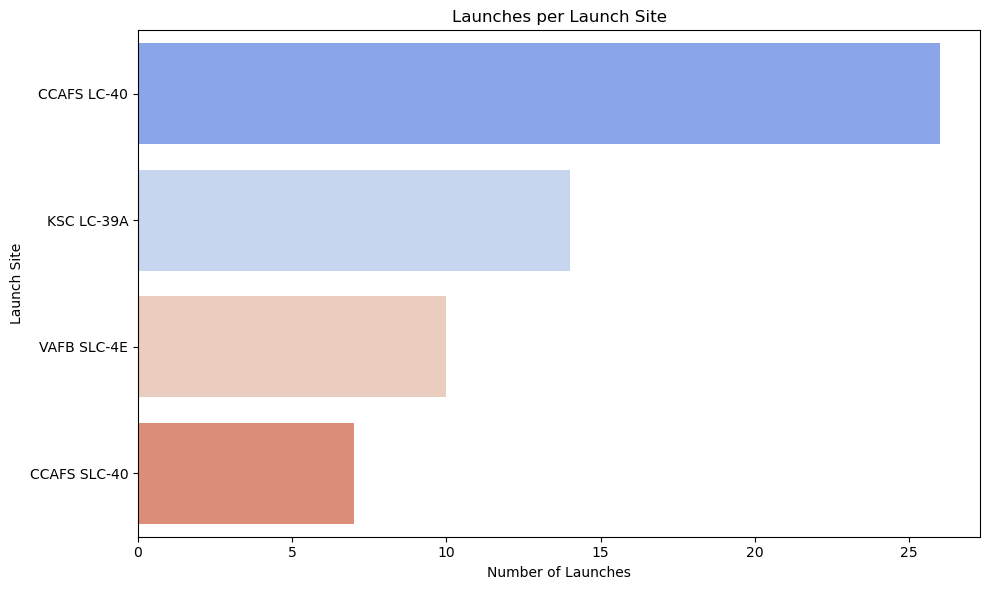

In [311]:
plt.figure(figsize=(10, 6))
sns.countplot(data=spacex_data_1, y="Launch Site", order=spacex_data_1["Launch Site"].value_counts().index, palette="coolwarm")
plt.title("Launches per Launch Site")
plt.xlabel("Number of Launches")
plt.ylabel("Launch Site")
plt.tight_layout()

# Frequency of each Payload Mass across data

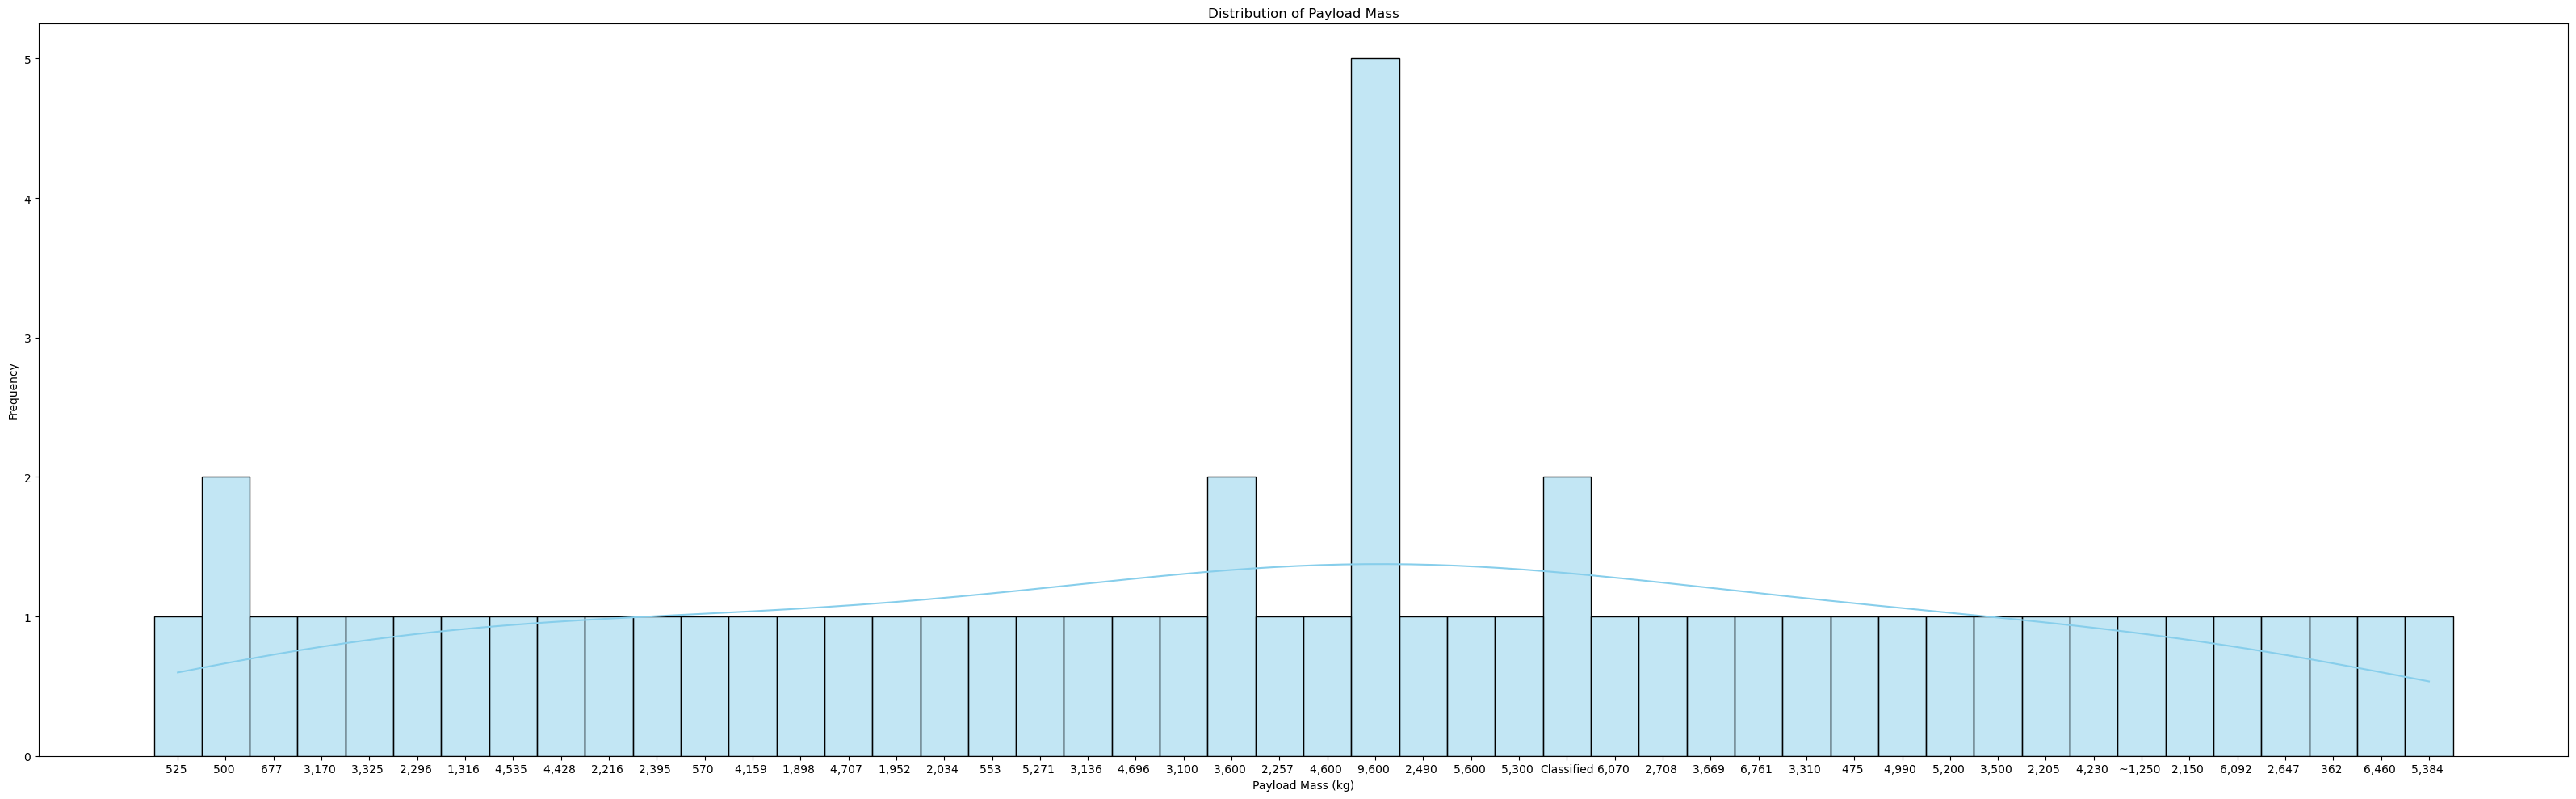

In [377]:
plt.figure(figsize=(32, 10))
sns.histplot(spacex_data_1["Payload Mass (kg)"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Payload Mass")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Frequency")
plt.tight_layout()

In [325]:
spacex_data_1.columns

Index(['Flight Number', 'Date', 'Time (UTC)', 'Booster Version', 'Launch Site',
       'Payload', 'Payload Mass (kg)', 'Orbit', 'Customer', 'Mission Outcome',
       'Landing Outcome', 'Year'],
      dtype='object')

# Frequency of Booster Versions used accross Dataset

C:\Users\PMLS\AppData\Local\Temp\ipykernel_23832\3759763305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spacex_data_1, y="Booster Version", order=spacex_data_1["Booster Version"].value_counts().head(10).index, palette="viridis")


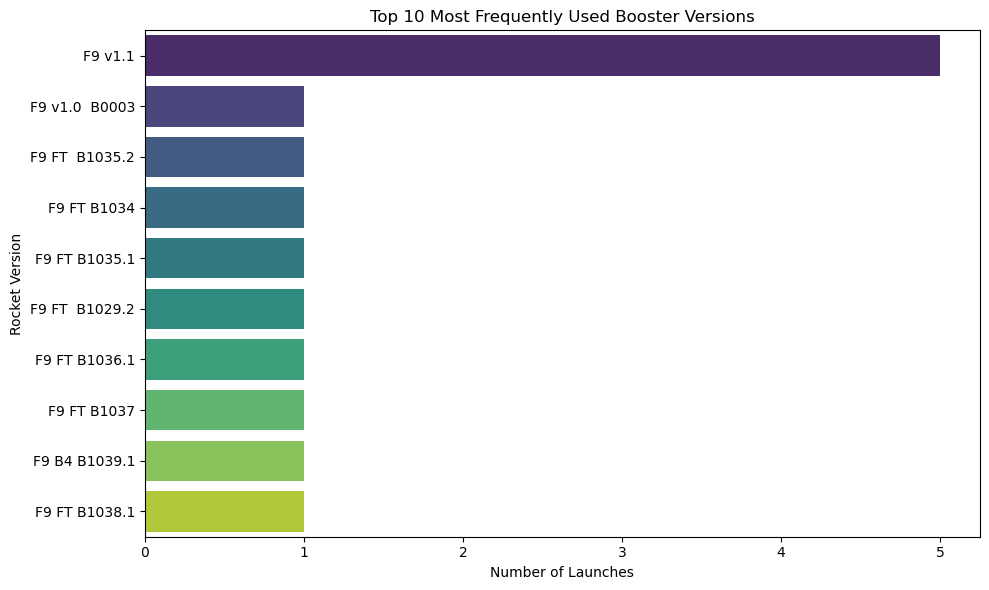

In [329]:
plt.figure(figsize=(10, 6))
sns.countplot(data=spacex_data_1, y="Booster Version", order=spacex_data_1["Booster Version"].value_counts().head(10).index, palette="viridis")
plt.title("Top 10 Most Frequently Used Booster Versions")
plt.xlabel("Number of Launches")
plt.ylabel("Rocket Version")
plt.tight_layout()

# Distribution of Number Of Launches across 8 Years

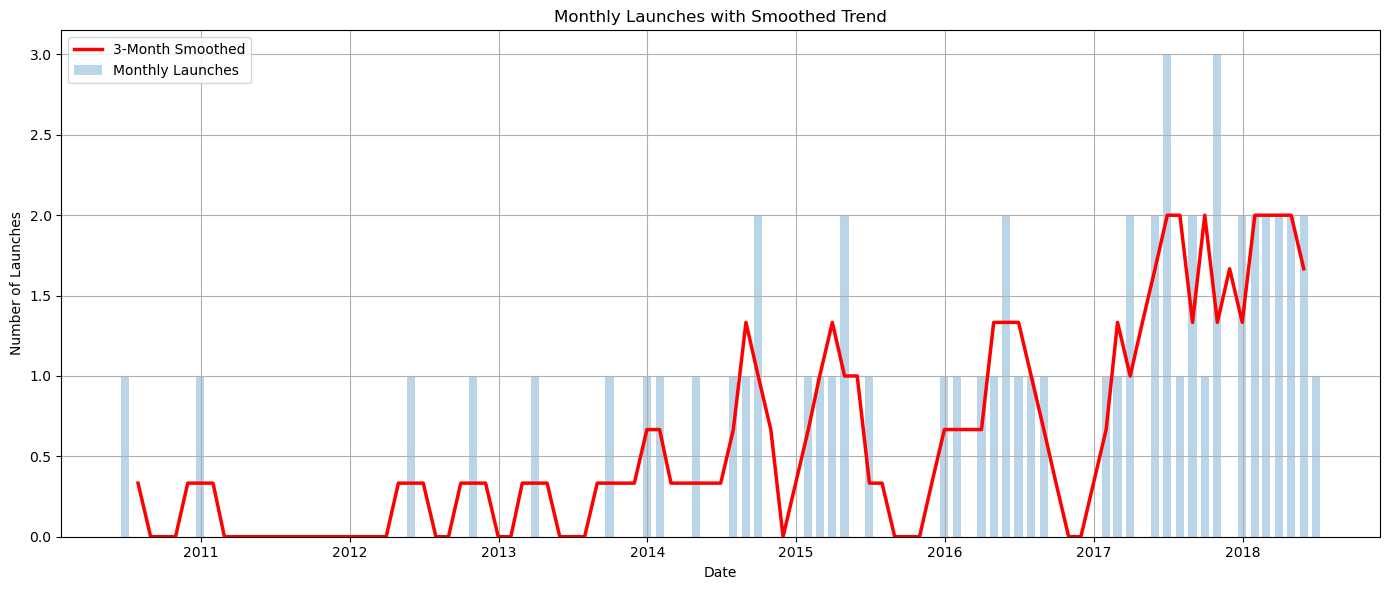

In [335]:
plt.figure(figsize=(14, 6))
plt.bar(monthly_launches.index, monthly_launches, width=20, alpha=0.3, label='Monthly Launches')
plt.plot(smoothed_launches.index, smoothed_launches, color='red', linewidth=2.5, label='3-Month Smoothed')
plt.title("Monthly Launches with Smoothed Trend")
plt.xlabel("Date")
plt.ylabel("Number of Launches")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mission Outcomes distribution with respect to launch site

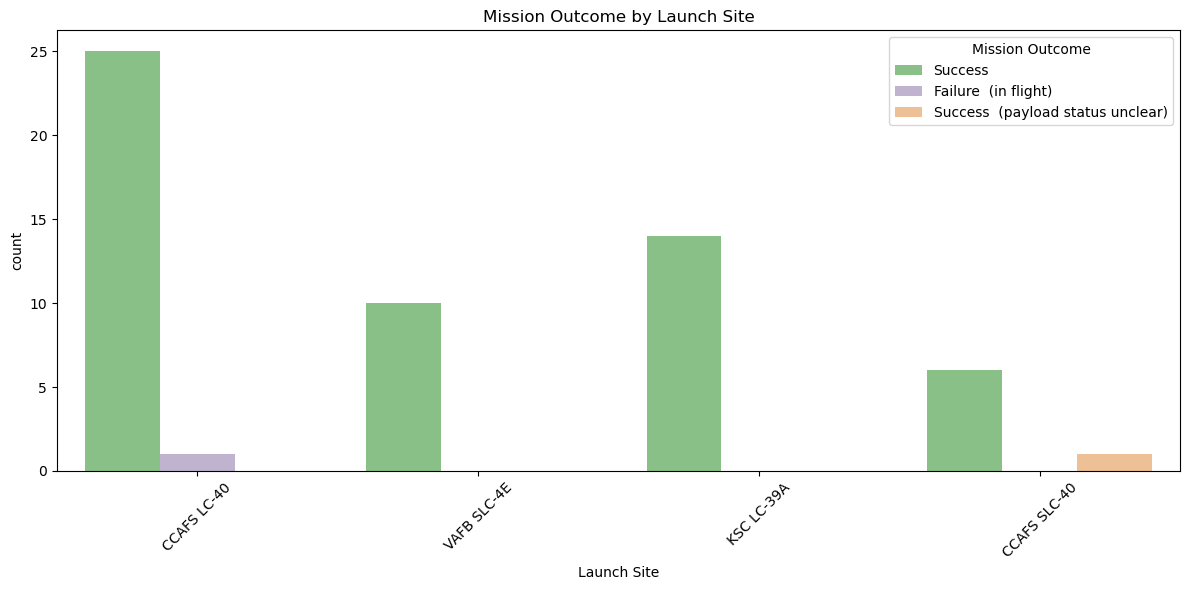

In [341]:
plt.figure(figsize=(12, 6))
sns.countplot(data=spacex_data_1, x="Launch Site", hue="Mission Outcome", palette="Accent")
plt.title("Mission Outcome by Launch Site")
plt.xticks(rotation=45)
plt.tight_layout()

# Since the correlations is very low , i will go for any classification algorithm to classiffy on which payloads from which launchsites on which year with what payload mass and booster version was the Landing success rate was the highest.


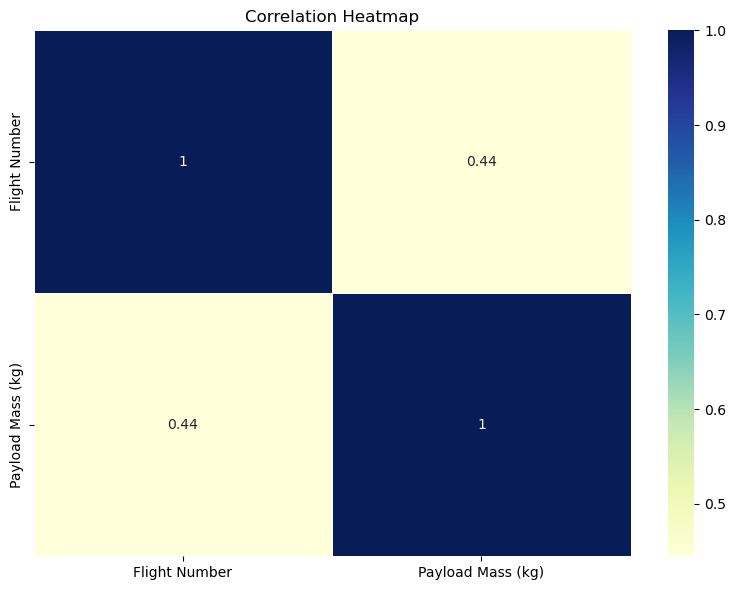

In [389]:
plt.figure(figsize=(8, 6))
numerical_cols = spacex_data_1.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_cols.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()

# Data Preprocessing For feeding it to any ML Model

In [402]:
# Convert Date to datetime and extract year
spacex_data_1['Date'] = pd.to_datetime(spacex_data_1['Date'])
spacex_data_1['Year'] = spacex_data_1['Date'].dt.year

# Clean and convert 'Payload Mass (kg)'
spacex_data_1['Payload Mass (kg)'] = pd.to_numeric(spacex_data_1['Payload Mass (kg)'], errors='coerce')

# Drop rows with missing key data
spacex_data_1.dropna(subset=['Payload Mass (kg)', 'Landing Outcome'], inplace=True)

# Define target: Landing Outcome
spacex_data_1['Landing Success'] = spacex_data_1['Landing Outcome'].apply(
    lambda x: 1 if 'Success' in x else 0
)

# Training RandomForestClassifier Model

In [406]:
# Select features and target
features = spacex_data_1[['Launch Site', 'Year', 'Payload Mass (kg)', 'Booster Version']]
target = spacex_data_1['Landing Success']

# Encode categorical features
features_encoded = pd.get_dummies(features, columns=['Launch Site', 'Booster Version'], drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [408]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [410]:
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[6 1]
 [2 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.67      0.50      0.57         4

    accuracy                           0.73        11
   macro avg       0.71      0.68      0.69        11
weighted avg       0.72      0.73      0.72        11



# Diagnol Values show Correct Predictions by the model , Off-Diagonal values gives models mistakes.

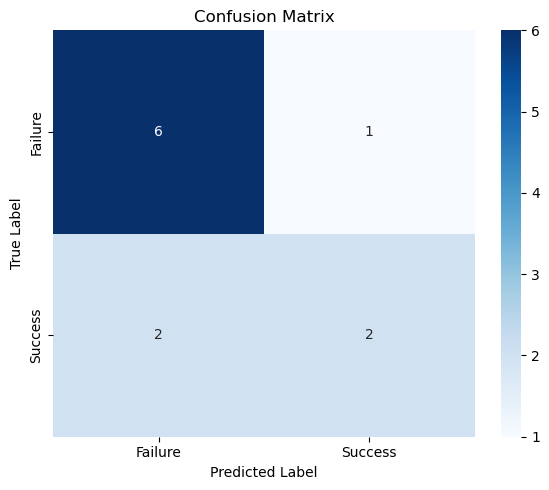

In [414]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Failure', 'Success']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()

# Preprocessing 2nd Dataset

In [700]:
spacex_data_2 = pd.read_csv('output_file.csv')

In [664]:
spacex_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fairings               169 non-null    object 
 1   links                  205 non-null    object 
 2   static_fire_date_utc   121 non-null    object 
 3   static_fire_date_unix  121 non-null    float64
 4   net                    205 non-null    bool   
 5   window                 117 non-null    float64
 6   rocket                 205 non-null    object 
 7   success                186 non-null    float64
 8   failures               205 non-null    object 
 9   details                134 non-null    object 
 10  crew                   205 non-null    object 
 11  ships                  205 non-null    object 
 12  capsules               205 non-null    object 
 13  payloads               205 non-null    object 
 14  launchpad              205 non-null    object 
 15  flight

In [652]:
spacex_data_2.shape

(205, 228)

# Performing EDA on spacex_data_2

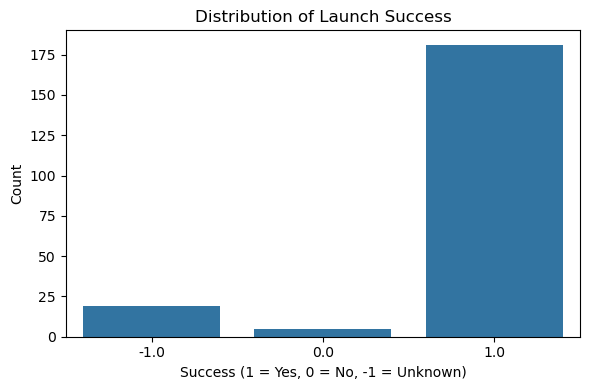

In [429]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=spacex_data_2['success'])
plt.title("Distribution of Launch Success")
plt.xlabel("Success (1 = Yes, 0 = No, -1 = Unknown)")
plt.ylabel("Count")
plt.tight_layout()

In [447]:
# Convert 'date_local' to datetime
spacex_data_2['date_local'] = pd.to_datetime(spacex_data_2['date_local'], errors='coerce')

C:\Users\PMLS\AppData\Local\Temp\ipykernel_23832\553355648.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_launches = spacex_data_2.resample('M', on='date_local').size()


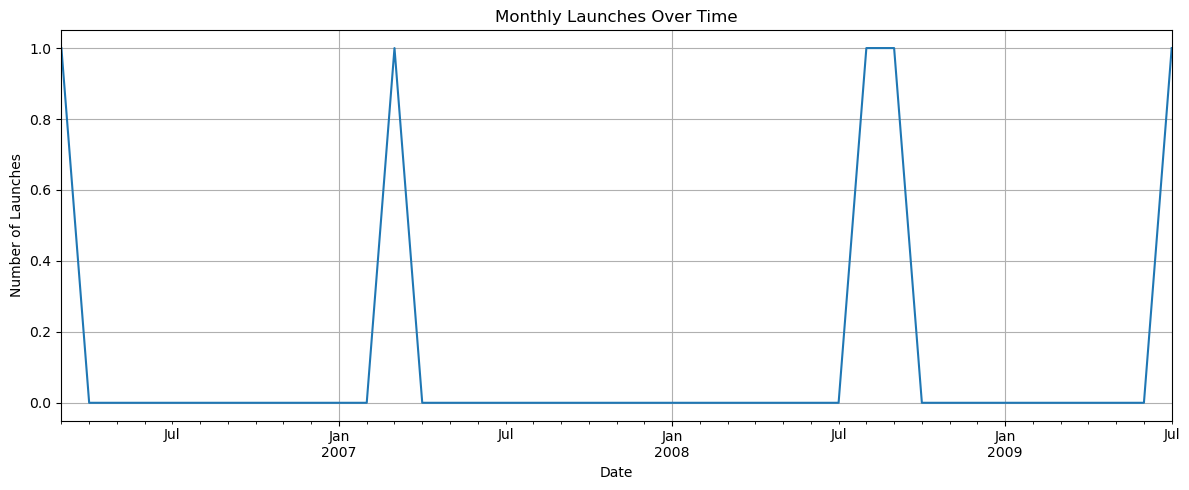

In [449]:
monthly_launches = spacex_data_2.resample('M', on='date_local').size()

plt.figure(figsize=(12, 5))
monthly_launches.plot()
plt.title("Monthly Launches Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Launches")
plt.grid(True)
plt.tight_layout()

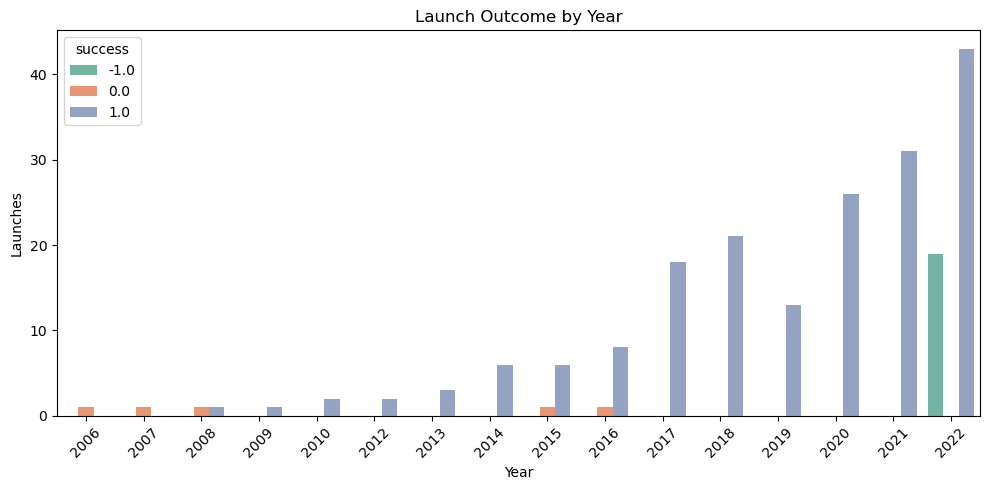

In [451]:
plt.figure(figsize=(10, 5))
sns.countplot(data=spacex_data_2, x='year', hue='success', palette="Set2")
plt.title("Launch Outcome by Year")
plt.xlabel("Year")
plt.ylabel("Launches")
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_23832\1965044228.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_success = spacex_data_2.set_index('date_local').resample('M')['success'].mean()


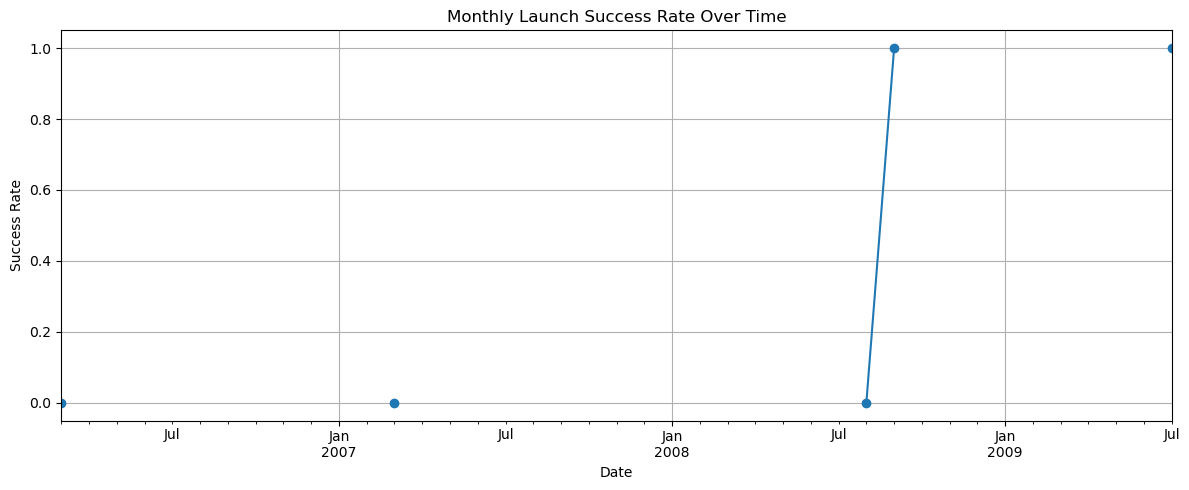

In [465]:
spacex_data_2['date_local'] = pd.to_datetime(spacex_data_2['date_local'])

monthly_success = spacex_data_2.set_index('date_local').resample('M')['success'].mean()

plt.figure(figsize=(12, 5))
monthly_success.plot(marker='o')
plt.title("Monthly Launch Success Rate Over Time")
plt.ylabel("Success Rate")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()

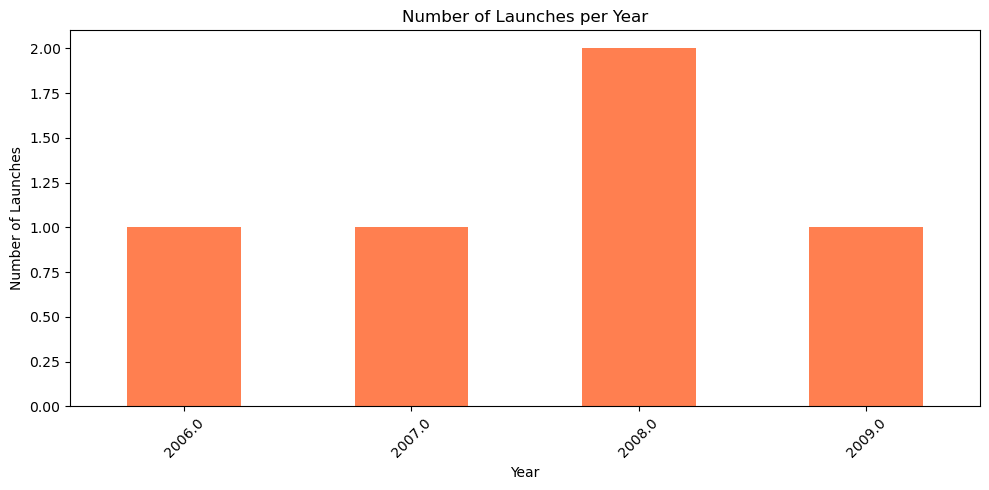

In [467]:
spacex_data_2['year'] = spacex_data_2['date_local'].dt.year
yearly_launches = spacex_data_2['year'].value_counts().sort_index()

yearly_launches.plot(kind='bar', color='coral', figsize=(10, 5))
plt.title("Number of Launches per Year")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.xticks(rotation=45)
plt.tight_layout()

In [601]:
spacex_data_2.head()

,fairings,static_fire_date_utc,static_fire_date_unix,net,window,success,flight_number,date_utc,date_unix,date_local,upcoming,auto_update,tbd,year,month,day,hour,rocket_5e9d0d95eda69973a809d1ec,rocket_5e9d0d95eda69974db09d1ed,launchpad_5e9e4502f509092b78566f87,launchpad_5e9e4502f509094188566f88,launchpad_5e9e4502f5090995de566f86,name_ABS-3A / Eutelsat 115W B,name_ANASIS-II,name_Amos-17,name_Amos-6,name_ArabSat 6A,name_AsiaSat 6,name_AsiaSat 8,name_Ax-1,name_Bangabandhu-1,name_Boeing X-37B OTV-5,name_BulgariaSat-1,name_CASSIOPE,name_CCtCap Demo Mission 1,name_CCtCap Demo Mission 2,name_COTS 1,name_COTS 2,name_CRS-1,name_CRS-10,name_CRS-11,name_CRS-12,name_CRS-13,name_CRS-14,name_CRS-15,name_CRS-16,name_CRS-17,name_CRS-18,name_CRS-19,name_CRS-2,name_CRS-20,name_CRS-21,name_CRS-22 & IROSA,name_CRS-23,name_CRS-24,name_CRS-25,name_CRS-26,name_CRS-3,name_CRS-4,name_CRS-5,name_CRS-6,name_CRS-7,name_CRS-8,name_CRS-9,name_CSG-2,name_Crew Dragon In Flight Abort Test,name_Crew-1,name_Crew-2,name_Crew-3,name_Crew-4,name_Crew-5,name_DART,name_DSCOVR,name_DemoSat,name_EchoStar 23,name_Es’hail 2,name_Eutelsat 10B,name_Falcon 9 Test Flight,name_Falcon Heavy Test Flight,name_FalconSat,name_FormoSat-5,name_GPS III SV01,name_GPS III SV03 (Columbus),name_GPS III SV04 (Sacagawea),name_GPS III SV05,name_Galaxy 31 (23R) & 32 (17R),name_Galaxy 33 (15R) & 34 (12R),name_Globalstar FM15,name_Hispasat 30W-6,name_Hotbird 13F,name_Hotbird 13G,name_IXPE,name_Inmarsat-5 F4,name_Inspiration4,name_Intelsat 35e,name_Iridium NEXT Mission 1,name_Iridium NEXT Mission 2,name_Iridium NEXT Mission 3,name_Iridium NEXT Mission 4,name_Iridium NEXT Mission 5,name_Iridium NEXT Mission 6,name_Iridium NEXT Mission 7,name_Iridium NEXT Mission 8,name_JCSAT-16,name_JCSAT-2B,name_JCSat 18 / Kacific 1,name_Jason 3,name_KPLO,name_KoreaSat 5A,name_Merah Putih,name_NROL-108,name_NROL-76,name_NROL-85,name_NROL-87,name_Nilesat-301,name_Nusantara Satu (PSN-6) / S5 / Beresheet,"name_O3b mPower 1,2",name_O3b mPower 3.4,name_OG-2 Mission 1,name_OG-2 Mission 2,name_Paz / Starlink Demo,name_RADARSAT Constellation,name_RatSat,name_RazakSat,name_SAOCOM 1A,"name_SAOCOM 1B, GNOMES-1, Tyvak-0172",name_SARah 1,name_SES-10,name_SES-11 / Echostar 105,name_SES-12,name_SES-16 / GovSat-1,name_SES-18 & SES-19,name_SES-22,name_SES-8,name_SES-9,name_SSO-A,name_STP-2,name_SWOT,name_SXM-7,name_SXM-8,name_Sentinel-6 Michael Freilich,name_Starlink 2-1 (v1.5),name_Starlink 3-1 (v1.5),name_Starlink 3-2 (v1.5),name_Starlink 3-3 (v1.5),name_Starlink 3-4 (v1.5),name_Starlink 4-1 (v1.5),name_Starlink 4-10 (v1.5),name_Starlink 4-11 (v1.5),name_Starlink 4-12 (v1.5),name_Starlink 4-13 (v1.5),name_Starlink 4-14 (v1.5),name_Starlink 4-15 (v1.5),name_Starlink 4-16 (v1.5),name_Starlink 4-17 (v1.5),name_Starlink 4-18 (v1.5),name_Starlink 4-19 (v1.5),name_Starlink 4-2 (v1.5) & Blue Walker 3,name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,name_Starlink 4-21 (v1.5),name_Starlink 4-22 (v1.5),name_Starlink 4-23 (v1.5),name_Starlink 4-25 (v1.5),name_Starlink 4-26 (v1.5),name_Starlink 4-27 (v1.5),name_Starlink 4-3 (v1.5),name_Starlink 4-34 (v1.5),name_Starlink 4-35 (v1.5),name_Starlink 4-36 (v1.5),name_Starlink 4-37 (v1.5),name_Starlink 4-4 (v1.5),name_Starlink 4-5 (v1.5),name_Starlink 4-6 (v1.5),name_Starlink 4-7 (v1.5),name_Starlink 4-8 (v1.5),name_Starlink 4-9 (v1.5),name_Starlink v0.9,name_Starlink-1,name_Starlink-10 (v1.0) & SkySat 19-21,name_Starlink-11 (v1.0),name_Starlink-12 (v1.0),name_Starlink-13 (v1.0),name_Starlink-14 (v1.0),name_Starlink-15 (v1.0),name_Starlink-16 (v1.0),name_Starlink-17 (v1.0),name_Starlink-18 (v1.0),name_Starlink-19 (v1.0),name_Starlink-2,name_Starlink-20 (v1.0),name_Starlink-21 (v1.0),name_Starlink-22 (v1.0),name_Starlink-23 (v1.0),name_Starlink-24 (v1.0),name_Starlink-25 (v1.0),name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,name_Starlink-27 (v1.0),name_Starlink-28 (v1.0),name_Starlink-3,name_Starlink-4,name_Starlink-5,name_Starlink-6,name_Starlink-7,name_Starlink-8 & SkySat 16-18,name_Star

In [774]:
# filtered data
cols_to_keep = ['rocket', 'success', 'failures', 'details', 'payloads', 'launchpad', 'flight_number', 'name']
spacex_data_2 = spacex_data_2[cols_to_keep].dropna(subset=['success'])

In [776]:
spacex_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 2 to 56
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Flight Number      52 non-null     float64       
 1   Date               53 non-null     datetime64[ns]
 2   Time (UTC)         53 non-null     object        
 3   Booster Version    53 non-null     object        
 4   Launch Site        53 non-null     object        
 5   Payload            53 non-null     object        
 6   Payload Mass (kg)  53 non-null     float64       
 7   Orbit              53 non-null     object        
 8   Customer           53 non-null     object        
 9   Mission Outcome    53 non-null     object        
 10  Landing Outcome    53 non-null     object        
 11  Year               53 non-null     int32         
 12  Landing Success    53 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(8)
memory u

In [778]:
spacex_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 186
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rocket         186 non-null    object 
 1   success        186 non-null    float64
 2   failures       186 non-null    object 
 3   details        134 non-null    object 
 4   payloads       186 non-null    object 
 5   launchpad      186 non-null    object 
 6   flight_number  186 non-null    int64  
 7   name           186 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.1+ KB


# Mergring Dataset 1 & 2 Together on Common features  

In [780]:
# Step 1: Prepare flight numbers and merge
df1_clean = spacex_data_1.dropna(subset=['Flight Number']).copy()
df1_clean['Flight Number'] = df1_clean['Flight Number'].astype(int)

df2_clean = spacex_data_2.copy()
df2_clean['flight_number'] = df2_clean['flight_number'].astype(int)

merged = pd.merge(df1_clean, df2_clean, left_on='Flight Number', right_on='flight_number', how='outer')

# Step 2: Fill missing values with simple imputation where possible

# Example numeric imputation
num_cols = ['Payload Mass (kg)', 'success', 'flight_number', 'Flight Number', 'Landing Success']
num_imputer = SimpleImputer(strategy='median')
merged[num_cols] = num_imputer.fit_transform(merged[num_cols])

# Example categorical imputation (mode)
cat_cols = ['Booster Version', 'Launch Site', 'Payload', 'Orbit', 'Customer', 'Mission Outcome', 'Landing Outcome', 'rocket', 'failures', 'details', 'payloads', 'launchpad', 'name']
for col in cat_cols:
    if col in merged.columns:
        merged[col].fillna(merged[col].mode()[0], inplace=True)

# Text fields like 'details' can also be filled with a placeholder
if 'details' in merged.columns:
    merged['details'].fillna('No details available', inplace=True)

# Step 3: Domain knowledge based filling (example)
# If 'Mission Outcome' == 'Success', then 'success' = 1
merged.loc[merged['Mission Outcome'].str.lower() == 'success', 'success'] = 1

# If 'Landing Success' == 1, fill 'Landing Outcome' with 'Success'
merged.loc[merged['Landing Success'] == 1, 'Landing Outcome'] = merged['Landing Outcome'].fillna('Success')

# Step 4: Drop remaining rows with nulls if critical, or keep them for advanced imputations
merged_clean = merged.dropna()

print(merged_clean.info())


<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2 to 55
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Flight Number      52 non-null     float64       
 1   Date               52 non-null     datetime64[ns]
 2   Time (UTC)         52 non-null     object        
 3   Booster Version    52 non-null     object        
 4   Launch Site        52 non-null     object        
 5   Payload            52 non-null     object        
 6   Payload Mass (kg)  52 non-null     float64       
 7   Orbit              52 non-null     object        
 8   Customer           52 non-null     object        
 9   Mission Outcome    52 non-null     object        
 10  Landing Outcome    52 non-null     object        
 11  Year               52 non-null     float64       
 12  Landing Success    52 non-null     float64       
 13  rocket             52 non-null     object        
 14  success          

C:\Users\PMLS\AppData\Local\Temp\ipykernel_23832\3573191132.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].fillna(merged[col].mode()[0], inplace=True)


In [801]:
merged_clean.shape

(52, 21)

# Loading , Observing and Preprocessing 3rd Dataset

In [803]:
data_3 = pd.read_csv('spacex_cleaned.csv')

In [805]:
data_3.head()

,mission_name,launch_date,rocket_name,payload_mass,orbit,site_name,location,success
0,FalconSat,2006-03-24T22:30:00.000Z,Falcon 1,20.0,LEO,Kwajalein Atoll,Omelek Island,False
1,DemoSat,2007-03-21T01:10:00.000Z,Falcon 1,NaN,LEO,Kwajalein Atoll,Omelek Island,False
2,Trailblazer,2008-08-03T03:34:00.000Z,Falcon 1,NaN,LEO,Kwajalein Atoll,Omelek Island,False
3,RatSat,2008-09-28T23:15:00.000Z,Falcon 1,165.0,LEO,Kwajalein Atoll,Omelek Island,True
4,RazakSat,2009-07-13T03:35:00.000Z,Falcon 1,200.0,LEO,Kwajalein Atoll,Omelek Island,True


In [807]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mission_name  205 non-null    object 
 1   launch_date   205 non-null    object 
 2   rocket_name   205 non-null    object 
 3   payload_mass  166 non-null    float64
 4   orbit         192 non-null    object 
 5   site_name     205 non-null    object 
 6   location      205 non-null    object 
 7   success       186 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.9+ KB


In [809]:
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2 to 55
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Flight Number      52 non-null     float64       
 1   Date               52 non-null     datetime64[ns]
 2   Time (UTC)         52 non-null     object        
 3   Booster Version    52 non-null     object        
 4   Launch Site        52 non-null     object        
 5   Payload            52 non-null     object        
 6   Payload Mass (kg)  52 non-null     float64       
 7   Orbit              52 non-null     object        
 8   Customer           52 non-null     object        
 9   Mission Outcome    52 non-null     object        
 10  Landing Outcome    52 non-null     object        
 11  Year               52 non-null     float64       
 12  Landing Success    52 non-null     float64       
 13  rocket             52 non-null     object        
 14  success          

# Merging 3rd Dataset with merged dataset of 1st & 2nd Dataset

In [879]:
# --- STEP 1: Rename columns in both datasets for consistency ---
data_3_renamed = data_3.rename(columns={
    'rocket_name': 'rocket',
    'payload_mass': 'payload_mass_kg',
    'site_name': 'launchpad',
    # you can rename more columns if needed
})
merged_clean_renamed = merged_clean.rename(columns={
    'Date': 'launch_date',
    'Payload Mass (kg)': 'payload_mass_kg',
    'Launch Site': 'launchpad',
    'rocket': 'rocket',
})
# --- STEP 2: Convert datetime columns to timezone naive (drop tzinfo) ---
data_3_renamed['launch_date'] = pd.to_datetime(data_3_renamed['launch_date']).dt.tz_localize(None)
merged_clean_renamed['launch_date'] = pd.to_datetime(merged_clean_renamed['launch_date']).dt.tz_localize(None)
# --- STEP 3: Fix any dtype issues for merge keys ---
# Convert payload_mass_kg to float for both (important for matching)
data_3_renamed['payload_mass_kg'] = pd.to_numeric(data_3_renamed['payload_mass_kg'], errors='coerce')
merged_clean_renamed['payload_mass_kg'] = pd.to_numeric(merged_clean_renamed['payload_mass_kg'], errors='coerce')
# Convert 'rocket' and 'launchpad' to lowercase string for consistent matching
data_3_renamed['rocket'] = data_3_renamed['rocket'].str.lower()
merged_clean_renamed['rocket'] = merged_clean_renamed['rocket'].str.lower()
data_3_renamed['launchpad'] = data_3_renamed['launchpad'].str.lower()
merged_clean_renamed['launchpad'] = merged_clean_renamed['launchpad'].str.lower()
# --- STEP 4: Merge with outer join to keep max rows ---
merged_df = pd.merge(
    data_3_renamed,
    merged_clean_renamed,
    on=['rocket', 'launch_date', 'launchpad', 'payload_mass_kg'],
    how='outer',
    suffixes=('_d3', '_mc')
)
# --- STEP 5: Fill missing values ---
# For numeric columns, fill NaNs with median or zeros
numeric_cols = ['payload_mass_kg']
for col in numeric_cols:
    if col in merged_df.columns:
        merged_df[col].fillna(merged_df[col].median(), inplace=True)
# For categorical/object columns, fill NaNs with mode or 'unknown'
cat_cols = ['mission_name', 'orbit', 'location', 'Time (UTC)', 'Booster Version', 
            'Payload', 'Customer', 'Mission Outcome', 'Landing Outcome', 'failures',
            'details', 'payloads', 'name', 'rocket', 'launchpad']
for col in cat_cols:
    if col in merged_df.columns:
        mode_val = merged_df[col].mode()
        if not mode_val.empty:
            merged_df[col].fillna(mode_val[0], inplace=True)
        else:
            merged_df[col].fillna('unknown', inplace=True)
# For boolean/numeric success flags, fill NaNs with 0 or most frequent
if 'success' in merged_df.columns:
    merged_df['success'].fillna(0, inplace=True)
    merged_df['success'] = merged_df['success'].astype(int)
# --- STEP 6: Final clean up ---
# Drop duplicate columns if any remain, you can decide which to keep
cols_to_drop = [col for col in merged_df.columns if col.endswith('_d3') or col.endswith('_mc')]
# Optional: decide which ones to keep based on completeness or preference
# Example: drop one suffix group or merge columns manually if you want
# Reset index
merged_df.reset_index(drop=True, inplace=True)
# --- Step 7: Check for remaining nulls ---
print("Remaining nulls per column after filling:")
print(merged_df.isnull().sum())
# --- Now merged_df is your cleaned, merged dataset with minimal nulls ---

Remaining nulls per column after filling:
mission_name         0
launch_date          0
rocket               0
payload_mass_kg      0
orbit                0
launchpad            0
location             0
success_str         71
success              0
Flight Number      205
Time (UTC)           0
Booster Version      0
Payload              0
Orbit              205
Customer             0
Mission Outcome      0
Landing Outcome      0
Year               205
Landing Success    205
success_num        205
failures             0
details              0
payloads             0
flight_number      205
name                 0
dtype: int64


C:\Users\PMLS\AppData\Local\Temp\ipykernel_23832\3974383920.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].median(), inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_23832\3974383920.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

# More Data Preprocessing + label encoding + Train Test Split + Fitting it to RandomForestClassifer Model + Predicting test output + Gettting Confusion matrix + Classification report + accuracy score

In [919]:
df = merged_df.copy()

# --- Step 1: Drop irrelevant or highly null columns ---
drop_cols = [
    'success_str', 'Flight Number', 'Orbit', 'Year', 
    'success_num', 'flight_number', 'name'
]
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# --- Step 2: Filter out rows with null target and ensure correct target dtype ---
df = df[df['Landing Success'].notnull()]
df['Landing Success'] = df['Landing Success'].astype(int)

# --- Step 3: Handle categorical columns ---
categorical_cols = [
    'mission_name', 'rocket', 'orbit', 'launchpad', 'location',
    'Booster Version', 'Payload', 'Customer', 'Mission Outcome',
    'Landing Outcome', 'failures', 'details', 'payloads'
]

# Fill missing categorical values with a placeholder
df[categorical_cols] = df[categorical_cols].fillna('unknown')

# Initialize label encoders dictionary
label_encoders = {}

# Apply Label Encoding for each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# --- Step 4: Define features and target for model ---
features = [
    'rocket', 'orbit', 'launchpad', 'location', 'payload_mass_kg',
    'Booster Version', 'Payload', 'Customer', 'Mission Outcome',
    'Landing Outcome', 'failures', 'details', 'payloads', 'mission_name'
]

X = df[features]
y = df['Landing Success']

# --- Step 5: Split data into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 6: Train Random Forest Classifier ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Step 7: Evaluate model performance ---
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Confusion Matrix:
[[7 0]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11


Accuracy Score:
1.0


# Saving trained RandomForestClassifier Model + custom__label__encoders + custom__features__ + final dataset 

In [921]:
import pickle

# Save the trained model
with open("spacex_landing_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the label encoders dictionary
with open("spacex_label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# Save the list of feature column names
with open("spacex_features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

# Save the fully processed dataset (with encoded categorical features) for demo or reference
df.to_csv("spacex_final_dataset.csv", index=False)


# Doing Cross Validation to See Models Performance in different Intervals

In [923]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the entire dataset X, y using the trained model
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-validated scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validated scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


In [895]:
df.head()

,mission_name,launch_date,rocket,payload_mass_kg,orbit,launchpad,location,success,Time (UTC),Booster Version,Payload,Customer,Mission Outcome,Landing Outcome,Landing Success,failures,details,payloads
0,0,2012-05-22,0,525.0,0,0,0,0,7:44:00,34,9,12,1,3,0,3,30,0
1,0,2012-10-08,0,500.0,0,0,0,0,0:35:00,35,34,13,1,3,0,0,29,1
2,0,2013-03-01,0,677.0,0,0,0,0,15:10:00,36,40,13,1,3,0,0,42,2
3,0,2013-09-29,1,500.0,0,3,0,0,16:00:00,38,7,11,1,9,0,0,42,3
4,0,2013-12-03,1,3170.0,0,0,0,0,22:41:00,37,32,18,1,3,0,0,42,4


# Plotting Feature Importance

Text(0.5, 1.0, 'Feature Importance')

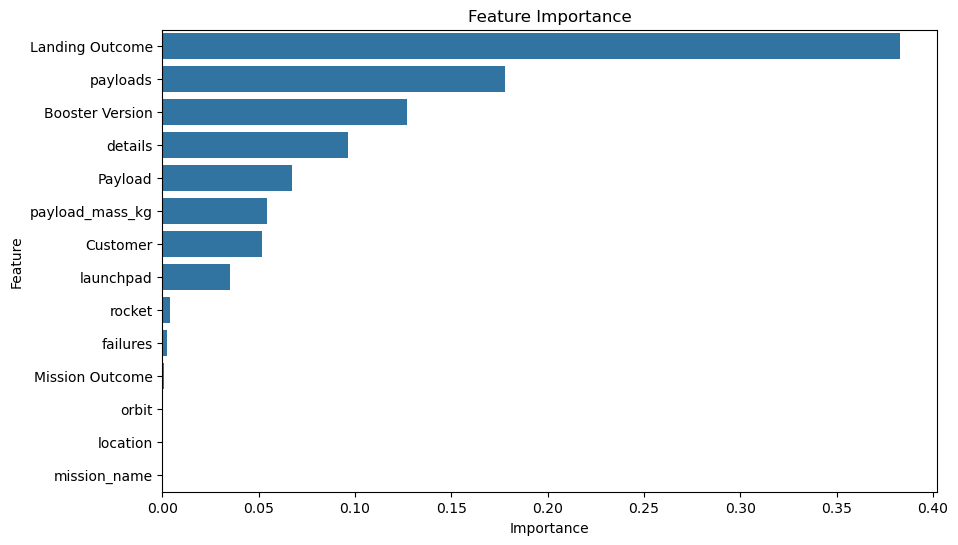

In [925]:
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')

# Loading custom__label__encoders

In [897]:
import joblib

# Load label encoders
label_encoders = joblib.load("spacex_label_encoders.pkl")

# Decoding features from custom__label__encoders file

In [899]:
decoded_df = df.copy()
for col, le in label_encoders.items():
    if col in decoded_df.columns:
        decoded_df[col] = le.inverse_transform(decoded_df[col])

# Viewing Perfectly Decoded Data (with labels)

In [907]:
decoded_df.head()

,mission_name,launch_date,rocket,payload_mass_kg,orbit,launchpad,location,success,Time (UTC),Booster Version,Payload,Customer,Mission Outcome,Landing Outcome,Landing Success,failures,details,payloads
0,ABS-2A / Eutelsat 117W B,2012-05-22,5e9d0d95eda69955f709d1eb,525.0,VLEO,ccafs lc-40,Cape Canaveral,0,7:44:00,F9 v1.0 B0005,Dragon demo flight C2+,NASA (COTS),Success,No attempt,0,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,"['5eb0e4b6b6c3bb0006eeb1e3', '5eb0e4b6b6c3bb00..."
1,ABS-2A / Eutelsat 117W B,2012-10-08,5e9d0d95eda69955f709d1eb,500.0,VLEO,ccafs lc-40,Cape Canaveral,0,0:35:00,F9 v1.0 B0006,SpaceX CRS-1,NASA (CRS),Success,No attempt,0,[],Ratsat was carried to orbit on the first succe...,['5eb0e4b7b6c3bb0006eeb1e5']
2,ABS-2A / Eutelsat 117W B,2013-03-01,5e9d0d95eda69955f709d1eb,677.0,VLEO,ccafs lc-40,Cape Canaveral,0,15:10:00,F9 v1.0 B0007,SpaceX CRS-2,NASA (CRS),Success,No attempt,0,[],This mission launches the eighteenth batch of ...,['5eb0e4b7b6c3bb0006eeb1e6']
3,ABS-2A / Eutelsat 117W B,2013-09-29,5e9d0d95eda69973a809d1ec,500.0,VLEO,vafb slc-4e,Cape Canaveral,0,16:00:00,F9 v1.1 B1003,CASSIOPE,MDA,Success,Uncontrolled (ocean),0,[],This mission launches the eighteenth batch of ...,['5eb0e4b7b6c3bb0006eeb1e7']
4,ABS-2A / Eutelsat 117W B,2013-12-03,5e9d0d95eda69973a809d1ec,3170.0,VLEO,ccafs lc-40,Cape Canaveral,0,22:41:00,F9 v1.1,SES-8,SES,Success,No attempt,0,[],This mission launches the eighteenth batch of ...,"['5eb0e4b9b6c3bb0006eeb1e8', '5eb0e4b9b6c3bb00..."


# Maaking sure to have the correct labels

In [909]:
data = pd.read_csv("spacex_cleaned.csv")
print(data.columns.tolist())

['mission_name', 'launch_date', 'rocket_name', 'payload_mass', 'orbit', 'site_name', 'location', 'success']


# Decoding Rocket names explicitily as they did not decode in previous decoding of data 

In [929]:
# Load the saved label encoders
label_encoders = joblib.load("spacex_label_encoders.pkl")

# Make a copy of the DataFrame to decode
decoded_df = df.copy()

# Reverse transform each column using its LabelEncoder
for col, le in label_encoders.items():
    if col in decoded_df.columns:
        decoded_df[col] = le.inverse_transform(decoded_df[col])
        print(f"Decoded column: {col}")  # Optional: to confirm progress

# View the rocket names
print(decoded_df['rocket'].unique())  # Adjust column name if different

Decoded column: mission_name
Decoded column: rocket
Decoded column: orbit
Decoded column: launchpad
Decoded column: location
Decoded column: Booster Version
Decoded column: Payload
Decoded column: Customer
Decoded column: Mission Outcome
Decoded column: Landing Outcome
Decoded column: failures
Decoded column: details
Decoded column: payloads
['5e9d0d95eda69955f709d1eb' '5e9d0d95eda69973a809d1ec'
 '5e9d0d95eda69974db09d1ed']


# Mapping encoded rocket names to decoded ones 

In [933]:
# Define mapping from rocket ID to rocket name
rocket_id_to_name = {
    "5e9d0d95eda69955f709d1eb": "Falcon 1",
    "5e9d0d95eda69973a809d1ec": "Falcon 9",
    "5e9d0d95eda69974db09d1ed": "Falcon Heavy"
}

# Replace rocket IDs with names in the DataFrame
decoded_df['rocket'] = decoded_df['rocket'].map(rocket_id_to_name)

# View unique rocket names
print(decoded_df['rocket'].unique())

['Falcon 1' 'Falcon 9' 'Falcon Heavy']


# Viewing Data Last time 

In [935]:
decoded_df.head(10)

,mission_name,launch_date,rocket,payload_mass_kg,orbit,launchpad,location,success,Time (UTC),Booster Version,Payload,Customer,Mission Outcome,Landing Outcome,Landing Success,failures,details,payloads
0,ABS-2A / Eutelsat 117W B,2012-05-22,Falcon 1,525.0,VLEO,ccafs lc-40,Cape Canaveral,0,7:44:00,F9 v1.0 B0005,Dragon demo flight C2+,NASA (COTS),Success,No attempt,0,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,"['5eb0e4b6b6c3bb0006eeb1e3', '5eb0e4b6b6c3bb00..."
1,ABS-2A / Eutelsat 117W B,2012-10-08,Falcon 1,500.0,VLEO,ccafs lc-40,Cape Canaveral,0,0:35:00,F9 v1.0 B0006,SpaceX CRS-1,NASA (CRS),Success,No attempt,0,[],Ratsat was carried to orbit on the first succe...,['5eb0e4b7b6c3bb0006eeb1e5']
2,ABS-2A / Eutelsat 117W B,2013-03-01,Falcon 1,677.0,VLEO,ccafs lc-40,Cape Canaveral,0,15:10:00,F9 v1.0 B0007,SpaceX CRS-2,NASA (CRS),Success,No attempt,0,[],This mission launches the eighteenth batch of ...,['5eb0e4b7b6c3bb0006eeb1e6']
3,ABS-2A / Eutelsat 117W B,2013-09-29,Falcon 9,500.0,VLEO,vafb slc-4e,Cape Canaveral,0,16:00:00,F9 v1.1 B1003,CASSIOPE,MDA,Success,Uncontrolled (ocean),0,[],This mission launches the eighteenth batch of ...,['5eb0e4b7b6c3bb0006eeb1e7']
4,ABS-2A / Eutelsat 117W B,2013-12-03,Falcon 9,3170.0,VLEO,ccafs lc-40,Cape Canaveral,0,22:41:00,F9 v1.1,SES-8,SES,Success,No attempt,0,[],This mission launches the eighteenth batch of ...,"['5eb0e4b9b6c3bb0006eeb1e8', '5eb0e4b9b6c3bb00..."
5,ABS-2A / Eutelsat 117W B,2014-01-06,Falcon 9,3325.0,VLEO,ccafs lc-40,Cape Canaveral,0,22:06:00,F9 v1.1,Thaicom 6,Thaicom,Success,No attempt,0,[],"Launch was scrubbed on first attempt, second l...",['5eb0e4bab6c3bb0006eeb1ea']
6,ABS-2A / Eutelsat 117W B,2014-04-18,Falcon 9,2296.0,VLEO,ccafs lc-40,Cape Canaveral,0,19:25:00,F9 v1.1,SpaceX CRS-3,NASA (CRS),Success,Controlled (ocean),0,[],"CRS-1 successful, but the secondary payload wa...","['5eb0e4bab6c3bb0006eeb1eb', '5eb0e4bab6c3bb00..."
7,ABS-2A / Eutelsat 117W B,2014-07-14,Falcon 9,1316.0,VLEO,ccafs lc-40,Cape Canaveral,0,15:15:00,F9 v1.1,OG2 Mission 1 6 Orbcomm-OG2 satellites,Orbcomm,Success,Controlled (ocean),0,[],Last launch of the original Falcon 9 v1.0 laun...,['5eb0e4bbb6c3bb0006eeb1ed']
8,ABS-2A / Eutelsat 117W B,2014-08-05,Falcon 9,4535.0,VLEO,ccafs lc-40,Cape Canaveral,0,8:00:00,F9 v1.1,AsiaSat 8,AsiaSat,Success,No attempt,0,[],Commercial mission and first Falcon 9 v1.1 fli...,['5eb0e4bbb6c3bb0006eeb1ee']
9,ABS-2A / Eutelsat 117W B,2014-09-07,Falcon 9,4428.0,VLEO,ccafs lc-40,Cape Canaveral,0,5:00:00,F9 v1.1 B1011,AsiaSat 6,AsiaSat,Success,No attempt,0,[],First GTO launch for Falcon 9,['5eb0e4bbb6c3bb0006eeb1ef']
